# Vehicle Loan Machine Learning Model
### Feature Engineering

In [123]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

In [124]:
#reading the data
loan_df_cleaned = pd.read_csv('/home/bravin/Documents/Loan Default Prediction Model/vehicle_loans_cleaned.csv', index_col=0)
loan_df_cleaned.head()

,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,EMPLOYMENT_TYPE,STATE_ID,EMPLOYEE_CODE_ID,...,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,LOAN_DEFAULT,AGE,DISBURSAL_MONTH,AVERAGE_ACCT_AGE_IN_MONTHS,CREDIT_HISTORY_LENGTH_IN_MONTHS
UNIQUEID,,,,,,,,,,,,,,,,,,,,,
420825,50578,58400,89.55,67,22807,45,1441,Salaried,6,1998,...,0,0,0,0,0,NO,34,3,0,0
537409,47145,65550,73.23,67,22807,45,1502,Self employed,6,1998,...,1991,0,0,1,0,YES,33,9,23,23
417566,53278,61360,89.63,67,22807,45,1497,Self employed,6,1998,...,0,0,0,0,0,NO,33,1,0,0
624493,57513,66113,88.48,67,22807,45,1501,Self employed,6,1998,...,31,0,0,0,1,YES,25,10,8,15
539055,52378,60300,88.39,67,22807,45,1495,Self employed,6,1998,...,0,0,0,0,1,YES,41,9,0,0


In [125]:
# explore categorical variables
def explore_cat_var(var):
    print(loan_df_cleaned[var].value_counts())
    print("\n")

    print(loan_df_cleaned[var].value_counts(normalize=True))
    sns.countplot(loan_df_cleaned[var])
    plt.show()
    print("\n")

    print(loan_df_cleaned.groupby(var)['LOAN_DEFAULT'].value_counts(normalize=True))
    print("\n")

    print(loan_df_cleaned.groupby(var)['LOAN_DEFAULT'].value_counts(normalize=True).unstack())
    print("\n")
    
    sns.catplot(x=var, hue='LOAN_DEFAULT', kind='count', data=loan_df_cleaned)
    plt.show()

In [126]:
# Function to explore numerical variables
def explore_cont_var(var):
    print(loan_df_cleaned[var].describe())
    print("\n")
    
    sns.boxplot(loan_df_cleaned[var], orient='v', width=0.2, color='pink')
    plt.show()
    print("\n")
    
    sns.distplot(loan_df_cleaned[var],hist=False, color='indigo')
    plt.show()
    print("\n")
    
    sns.boxplot(x='LOAN_DEFAULT', y=var, data=loan_df_cleaned, orient='v', width=0.2, color='pink')
    plt.show()
    print("\n")

count    233154.000000
mean      54356.993528
std       12971.314171
min       13320.000000
25%       47145.000000
50%       53803.000000
75%       60413.000000
max      990572.000000
Name: DISBURSED_AMOUNT, dtype: float64




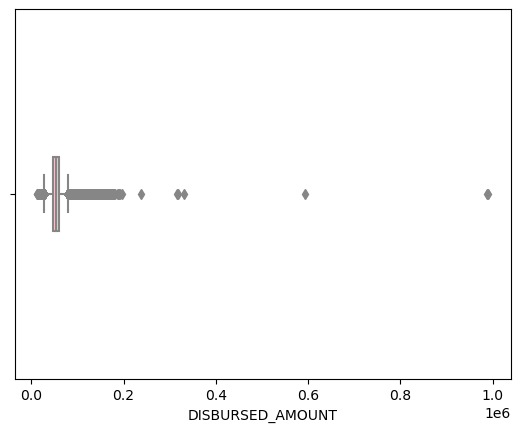

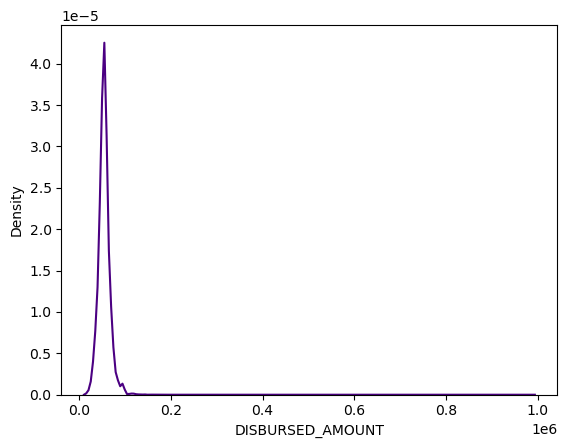

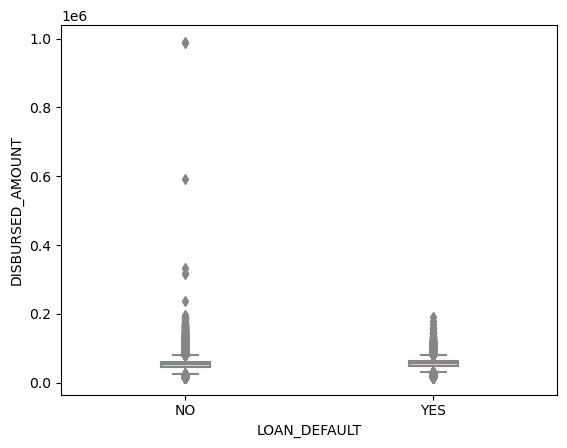

In [127]:
# explore disbursed amount
explore_cont_var('DISBURSED_AMOUNT')

In [128]:
# get row index of max disbursed amount
loan_df_cleaned['DISBURSED_AMOUNT'].idxmax()

440173

In [129]:
# use the row index to get the details of the loan
loan_df_cleaned.loc[loan_df_cleaned['DISBURSED_AMOUNT'].idxmax()]

DISBURSED_AMOUNT                                                                  990572
ASSET_COST                                                                       1628992
LTV                                                                                61.39
BRANCH_ID                                                                            138
SUPPLIER_ID                                                                        24062
MANUFACTURER_ID                                                                      152
CURRENT_PINCODE_ID                                                                  3368
EMPLOYMENT_TYPE                                                                  Missing
STATE_ID                                                                               9
EMPLOYEE_CODE_ID                                                                    2934
MOBILENO_AVL_FLAG                                                                      1
AADHAR_FLAG          

In [130]:
# create buckets for disbursed amount
disbursed_amount_bins = [13000, 30000, 45000, 60000, 75000, 150000, 1000000]
disbursed_amount_labels = ['13k-30k', '30k-45k', '45k-60k', '60k-75k', '75k-150k', '150k-1m']

In [131]:
# use pd.cut to create buckets
loan_df_cleaned['disbursed_amount_bins'] = pd.cut(loan_df_cleaned['DISBURSED_AMOUNT'], bins=disbursed_amount_bins, labels=disbursed_amount_labels)

45k-60k     126904
60k-75k      49824
30k-45k      40626
75k-150k     10871
13k-30k       4865
150k-1m         64
Name: disbursed_amount_bins, dtype: int64


45k-60k     0.544293
60k-75k     0.213696
30k-45k     0.174245
75k-150k    0.046626
13k-30k     0.020866
150k-1m     0.000274
Name: disbursed_amount_bins, dtype: float64


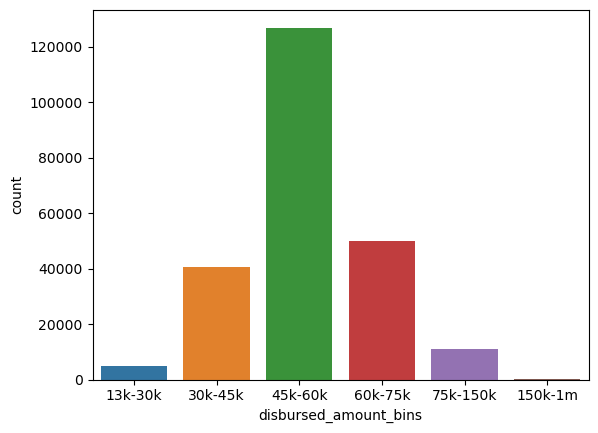



disbursed_amount_bins  LOAN_DEFAULT
13k-30k                NO              0.864748
                       YES             0.135252
30k-45k                NO              0.844853
                       YES             0.155147
45k-60k                NO              0.778778
                       YES             0.221222
60k-75k                NO              0.743738
                       YES             0.256262
75k-150k               NO              0.742342
                       YES             0.257658
150k-1m                NO              0.890625
                       YES             0.109375
Name: LOAN_DEFAULT, dtype: float64


LOAN_DEFAULT                 NO       YES
disbursed_amount_bins                    
13k-30k                0.864748  0.135252
30k-45k                0.844853  0.155147
45k-60k                0.778778  0.221222
60k-75k                0.743738  0.256262
75k-150k               0.742342  0.257658
150k-1m                0.890625  0.109375




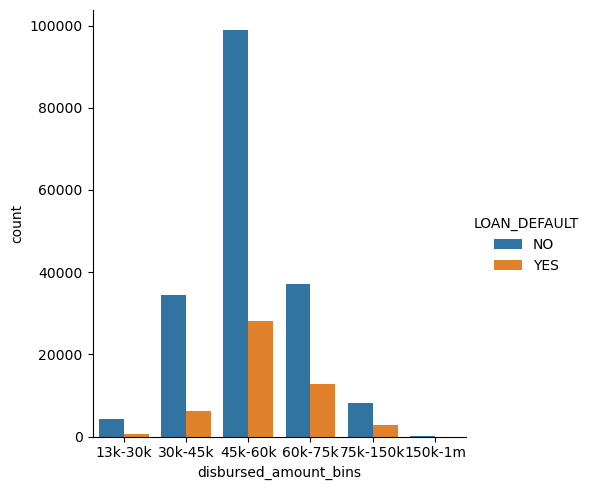

In [132]:
# explore buckets
explore_cat_var('disbursed_amount_bins')

### Disbursal Difference 

In [133]:
# calculate the disbursal Difference 
loan_df_cleaned['disbursal_difference'] = loan_df_cleaned['ASSET_COST'] - loan_df_cleaned['DISBURSED_AMOUNT']

# explore disbursal difference
loan_df_cleaned[['ASSET_COST', 'DISBURSED_AMOUNT', 'disbursal_difference']].head()

,ASSET_COST,DISBURSED_AMOUNT,disbursal_difference
UNIQUEID,,,
420825,58400,50578,7822
537409,65550,47145,18405
417566,61360,53278,8082
624493,66113,57513,8600
539055,60300,52378,7922


### Primary and Secondary Account Engineering


The loan data contains 14 columns providing information about any existing loans a customer may have. This data is split according to primary and secondary accounts, a primary account is a loan where the customer is the sole recipient of the disbursal, 
a secondary account is one where the customer is a co-applicant or guarantor for the loan 

- PRI_NO_OF_ACCTS: count of total loans taken by the customer at the time of disbursement  
- PRI_ACTIVE_ACCTS: count of active loans taken by the customer at the time of disbursement
- PRI_OVERDUE_ACCTS: count of default accounts at the time of disbursement    
- PRI_CURRENT_BALANCE: total Principal outstanding amount of the active loans at the time of disbursement        
- PRI_SANCTIONED_AMOUNT: total amount that was sanctioned for all the loans at the time of disbursement  
- PRI_DISBURSED_AMOUNT: total amount that was disbursed for all the loans at the time of disbursement
- PRIMARY_INSTAL_AMT: EMI Amount of the primary loan
- SEC_NO_OF_ACCTS: count of secondary total loans taken by the customer at the time of disbursement 
- SEC_ACTIVE_ACCTS: count of secondary active loans taken by the customer at the time of disbursement 
- SEC_OVERDUE_ACCTS: count of secondary accounts at the time of disbursement    
- SEC_CURRENT_BALANCE: total Principal outstanding amount of the secondary active loans at the time of disbursement 
- SEC_SANCTIONED_AMOUNT: total amount that was sanctioned for all the secondary loans at the time of disbursement  
- SEC_DISBURSED_AMOUNT: total amount that was disbursed for all the secondary loans at the time of disbursement
- SEC_INSTAL_AMT: EMI Amount of the secondary loan 




count    233154.000000
mean          2.440636
std           5.217233
min           0.000000
25%           0.000000
50%           0.000000
75%           3.000000
max         453.000000
Name: PRI_NO_OF_ACCTS, dtype: float64




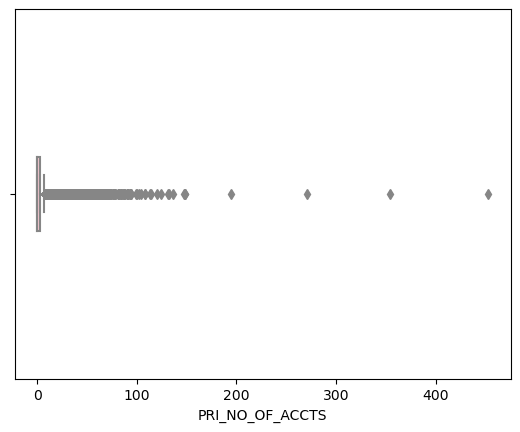

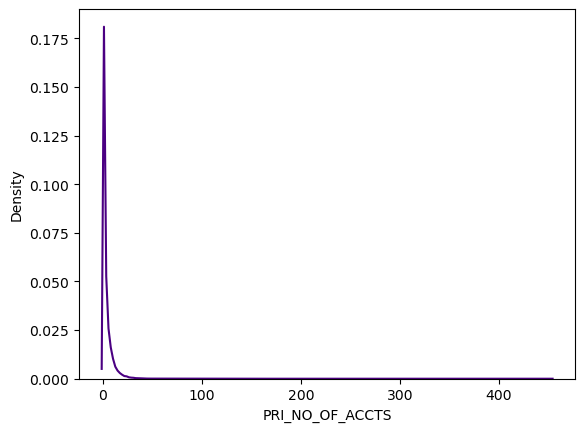

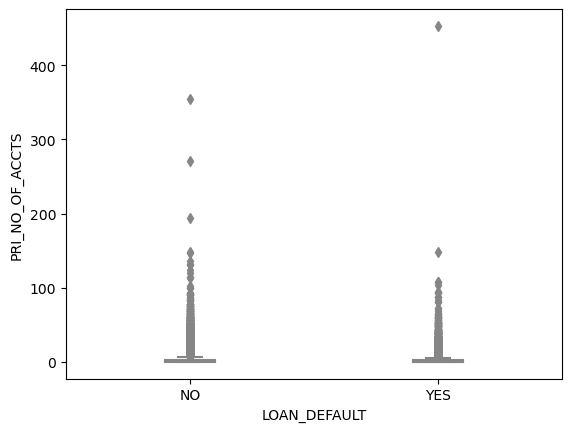

In [134]:
explore_cont_var('PRI_NO_OF_ACCTS')

count    233154.000000
mean          0.059081
std           0.626795
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          52.000000
Name: SEC_NO_OF_ACCTS, dtype: float64




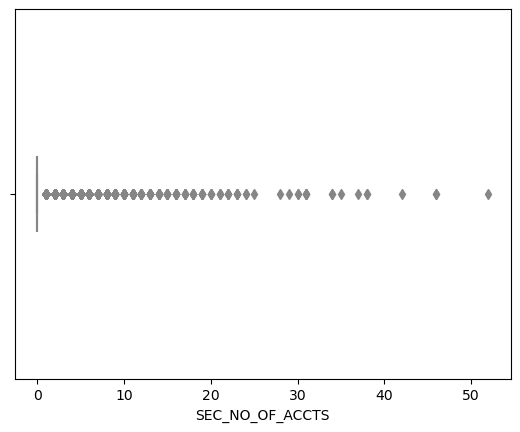

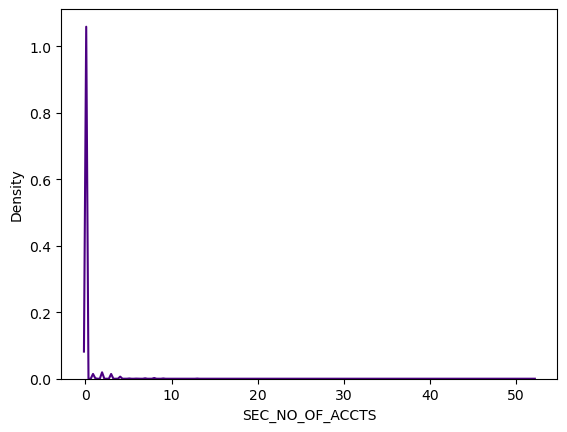

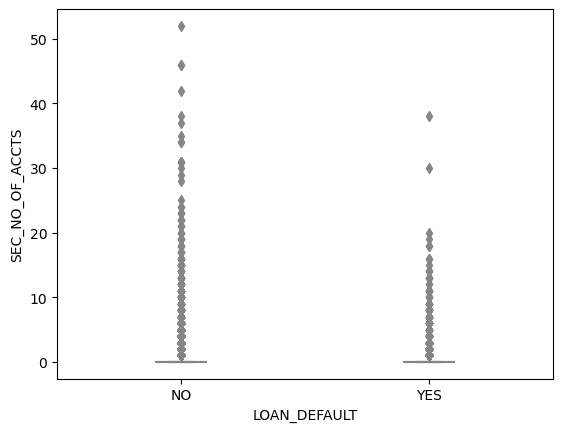

In [135]:
explore_cont_var('SEC_NO_OF_ACCTS')

### Total Accounts 

In [136]:
# create total accounts for primary and secondary
loan_df_cleaned['TOTAL_ACTIVE_ACCTS'] = loan_df_cleaned['PRI_ACTIVE_ACCTS'] + loan_df_cleaned['SEC_ACTIVE_ACCTS']
loan_df_cleaned['TOTAL_OVERDUE_ACCTS'] = loan_df_cleaned['PRI_OVERDUE_ACCTS'] + loan_df_cleaned['SEC_OVERDUE_ACCTS']
loan_df_cleaned['TOTAL_CURRENT_BALANCE'] = loan_df_cleaned['PRI_CURRENT_BALANCE'] + loan_df_cleaned['SEC_CURRENT_BALANCE']
loan_df_cleaned['TOTAL_SANCTIONED_AMOUNT'] = loan_df_cleaned['PRI_SANCTIONED_AMOUNT'] + loan_df_cleaned['SEC_SANCTIONED_AMOUNT'] 
loan_df_cleaned['TOTAL_DISBURSED_AMOUNT'] = loan_df_cleaned['PRI_DISBURSED_AMOUNT'] + loan_df_cleaned['SEC_DISBURSED_AMOUNT']
loan_df_cleaned['TOTAL_INSTAL_AMT'] = loan_df_cleaned['PRIMARY_INSTAL_AMT'] + loan_df_cleaned['SEC_INSTAL_AMT']

In [137]:
# DRop the columns that are not needed
loan_df_cleaned.drop(['PRI_NO_OF_ACCTS', 'SEC_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS', 'SEC_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS', 'SEC_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE', 'SEC_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT', 'SEC_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT', 'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT'], axis=1, inplace=True)

In [138]:
# percentage of overdues
loan_df_cleaned['OVERDUE_PERCENTAGE'] = loan_df_cleaned['TOTAL_OVERDUE_ACCTS'] / loan_df_cleaned['TOTAL_ACTIVE_ACCTS']

In [139]:
# checking for null values
loan_df_cleaned['OVERDUE_PERCENTAGE'].isnull().sum()

134014

In [140]:
# fill null values with 0
loan_df_cleaned['OVERDUE_PERCENTAGE'].fillna(0, inplace=True)

In [141]:
loan_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233154 entries, 420825 to 630213
Data columns (total 35 columns):
 #   Column                               Non-Null Count   Dtype   
---  ------                               --------------   -----   
 0   DISBURSED_AMOUNT                     233154 non-null  int64   
 1   ASSET_COST                           233154 non-null  int64   
 2   LTV                                  233154 non-null  float64 
 3   BRANCH_ID                            233154 non-null  int64   
 4   SUPPLIER_ID                          233154 non-null  int64   
 5   MANUFACTURER_ID                      233154 non-null  int64   
 6   CURRENT_PINCODE_ID                   233154 non-null  int64   
 7   EMPLOYMENT_TYPE                      233154 non-null  object  
 8   STATE_ID                             233154 non-null  int64   
 9   EMPLOYEE_CODE_ID                     233154 non-null  int64   
 10  MOBILENO_AVL_FLAG                    233154 non-null  int64   


### Scalling Numeric Variables 

In [142]:
# list of numeric variables
num_vars = ['disbursal_difference', 'TOTAL_ACTIVE_ACCTS', 'TOTAL_OVERDUE_ACCTS', 'TOTAL_CURRENT_BALANCE', 'TOTAL_SANCTIONED_AMOUNT', 'TOTAL_DISBURSED_AMOUNT', 'TOTAL_INSTAL_AMT', 'OVERDUE_PERCENTAGE']

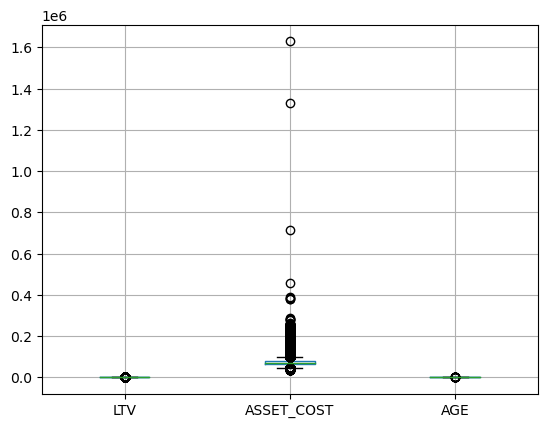

In [143]:
# visualize the problem
loan_df_cleaned[['LTV','ASSET_COST','AGE']].boxplot()
plt.show()

In [144]:
# create an instance of MinMaxScaler
scaler = MinMaxScaler()